# My DCT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack as fft
from joblib import Parallel, delayed
from time import time
import os

In [2]:
test = [231, 32, 233, 161, 24, 71, 140, 245]
dct_test = fft.dct(test, norm='ortho')
dct_test

array([ 401.9902051 ,    6.60001991,  109.16736544, -112.78557857,
         65.40737726,  121.83139804,  116.65648855,   28.80040722])

In [3]:
mat = [[231, 32, 233, 161, 24, 71, 140, 245], 
         [247, 40, 248, 245, 124, 204, 36, 107], 
         [234, 202, 245, 167, 9, 217, 239, 173], 
         [193, 190, 100, 167, 43, 180, 8, 70], 
         [11, 24, 210, 177, 81, 243, 8, 112], 
         [97, 195, 203, 47, 125, 114, 165, 181], 
         [193, 70, 174, 167, 41, 30, 127, 245], 
         [87, 149, 57, 192, 65, 129, 178, 228]]

In [4]:
def dct2(A):
    return fft.dct(fft.dct(A, axis=0, norm='ortho'), axis=1, norm='ortho')

print(dct2(mat))

[[ 1.11875000e+03  4.40221926e+01  7.59190503e+01 -1.38572411e+02
   3.50000000e+00  1.22078055e+02  1.95043868e+02 -1.01604906e+02]
 [ 7.71900790e+01  1.14868206e+02 -2.18014421e+01  4.13641351e+01
   8.77720598e+00  9.90829620e+01  1.38171516e+02  1.09092795e+01]
 [ 4.48351537e+01 -6.27524464e+01  1.11614114e+02 -7.63789658e+01
   1.24422160e+02  9.55984194e+01 -3.98287969e+01  5.85237670e+01]
 [-6.99836647e+01 -4.02408945e+01 -2.34970508e+01 -7.67320594e+01
   2.66457750e+01 -3.68328290e+01  6.61891485e+01  1.25429731e+02]
 [-1.09000000e+02 -4.33430857e+01 -5.55436908e+01  8.17347083e+00
   3.02500000e+01 -2.86602437e+01  2.44149822e+00 -9.41437025e+01]
 [-5.38783591e+00  5.66345009e+01  1.73021519e+02 -3.54234494e+01
   3.23878249e+01  3.34576728e+01 -5.81167864e+01  1.90225615e+01]
 [ 7.88439693e+01 -6.45924096e+01  1.18671203e+02 -1.50904840e+01
  -1.37316928e+02 -3.06196663e+01 -1.05114114e+02  3.98130497e+01]
 [ 1.97882438e+01 -7.81813409e+01  9.72311860e-01 -7.23464180e+01
  -

matrices = []
for N in range(1, 50, 1):
    matrices.append(np.random.randint(0, 300, size=(N, N)))

In [16]:
def new_matrix(N):
    return np.random.randint(0, 300, size=(N, N))
matrices = Parallel(n_jobs=5)(delayed(new_matrix)(N) for N in (2**p for p in range(1, 11)))

[array([[154, 262],
       [288,  36]]), array([[  7, 226, 168, 114],
       [ 34, 251, 241,  39],
       [207, 294, 268, 101],
       [ 89,  60, 284, 199]]), array([[ 82,  87, 206, 206,  36, 137, 297, 152],
       [170, 195, 279,   6, 152,  71, 252,  72],
       [ 19,  38,  51,  68,  83, 131, 220,  71],
       [168,  27,  50, 253, 133, 289, 274, 153],
       [248,  81, 130, 233, 196, 100, 193, 213],
       [134, 179, 211,  60, 258, 223,  41, 191],
       [ 32,  92,  18, 156,   0,  65,  42,  77],
       [ 40, 155,  32, 244,  34, 246, 285, 253]]), array([[277, 241, 203, 298, 126,  80, 220, 215, 251, 153,  66, 158, 193,
         77, 170, 200],
       [234, 299,  53,  54,  21, 245,  62, 106, 240,  20, 294, 159,  38,
        283,  91, 164],
       [132, 167, 126, 135, 258,  43, 234,  18, 276,  99,  66,   5, 249,
         39,  39, 159],
       [  5, 224, 144,  69, 224,  90, 180,  98,   7, 283, 118,   4, 269,
         15, 208, 296],
       [188,   7, 156,  94,  97, 239, 260, 230,  61, 288,  

In [6]:
def my_dct(v):
    N = len(v)
    a = [0] * N
    for k in range(0, N):
        for i in range(0, N):
            a[k] += np.cos(np.pi * k * ((2 * i + 1) / (2 * N))) * v[i]
        den = N / 2
        if(k == 0): den = N
        a[k] = (a[k] / np.sqrt(den))
    return a

def my_dct2(A):
    N = len(A)
    mr = np.zeros((N, N))
    mc = np.zeros((N, N))
    for i in range(0, N):
        mr[i] = my_dct(A[i])
    for j in range(0, N):
        mc[:, j] = my_dct(mr[:, j])
    return mc
    
print(my_dct2(mat))

[[ 1.11875000e+03  4.40221926e+01  7.59190503e+01 -1.38572411e+02
   3.50000000e+00  1.22078055e+02  1.95043868e+02 -1.01604906e+02]
 [ 7.71900790e+01  1.14868206e+02 -2.18014421e+01  4.13641351e+01
   8.77720598e+00  9.90829620e+01  1.38171516e+02  1.09092795e+01]
 [ 4.48351537e+01 -6.27524464e+01  1.11614114e+02 -7.63789658e+01
   1.24422160e+02  9.55984194e+01 -3.98287969e+01  5.85237670e+01]
 [-6.99836647e+01 -4.02408945e+01 -2.34970508e+01 -7.67320594e+01
   2.66457750e+01 -3.68328290e+01  6.61891485e+01  1.25429731e+02]
 [-1.09000000e+02 -4.33430857e+01 -5.55436908e+01  8.17347083e+00
   3.02500000e+01 -2.86602437e+01  2.44149822e+00 -9.41437025e+01]
 [-5.38783591e+00  5.66345009e+01  1.73021519e+02 -3.54234494e+01
   3.23878249e+01  3.34576728e+01 -5.81167864e+01  1.90225615e+01]
 [ 7.88439693e+01 -6.45924096e+01  1.18671203e+02 -1.50904840e+01
  -1.37316928e+02 -3.06196663e+01 -1.05114114e+02  3.98130497e+01]
 [ 1.97882438e+01 -7.81813409e+01  9.72311860e-01 -7.23464180e+01
  -

times = list()
for m in matrices:
    start = time()
    dct2(m)
    end = time()
    time_dct2 = end - start
    start = time()
    my_dct2(m)
    end = time()
    time_my_dct2 = end - start
    times.append([len(m), time_dct2, time_my_dct2])

In [19]:
def process(mat):
    print("... Computing DCT2 - Matrix size: ", len(mat))
    start = time()
    dct2(mat)
    end = time()
    time_dct2 = end - start
    start = time()
    my_dct2(mat)
    end = time()
    time_my_dct2 = end - start
    print("DONE Computed DCT2 - Matrix size: ", len(mat))
    return [len(mat), time_dct2, time_my_dct2]

In [17]:
times = Parallel(n_jobs=7)(delayed(process)(m) for m in matrices)

AttributeError: 'numpy.ndarray' object has no attribute 'set_yscale'

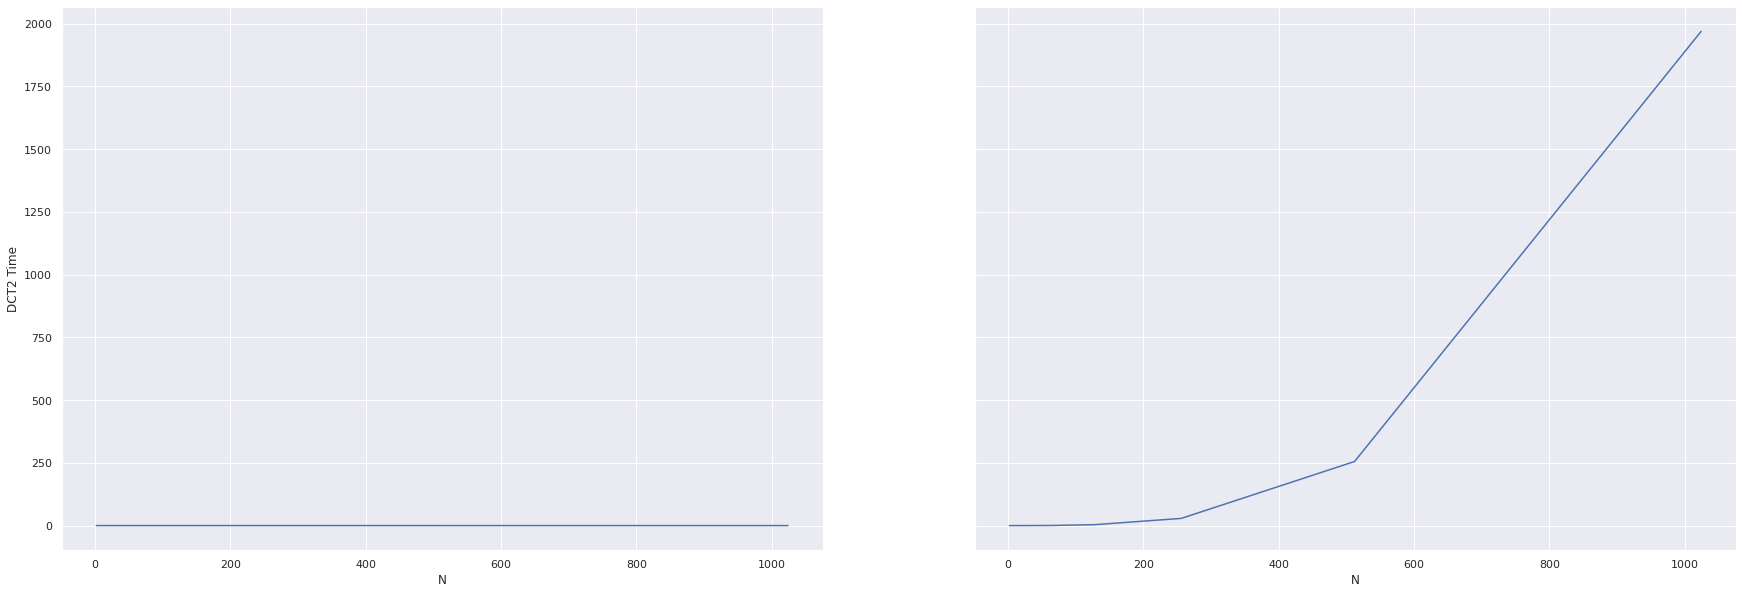

In [22]:
sns.set_theme(style="darkgrid")
df = pd.DataFrame(times, columns=['N', 'DCT2 Time', 'My DCT2 Time'])
fig, ax = plt.subplots(1, 2, figsize=(30, 10), sharey=True)
ax1 = sns.lineplot(data=df, x="N", y="DCT2 Time", ax=ax[0])
ax2 = sns.lineplot(data=df, x="N", y="My DCT2 Time", ax=ax[1])
ax1.set_yscale('log')
ax2.set_yscale('log')
